In [78]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import math

In [79]:
image = cv.imread("/home/lognod/predict")

(400, 398, 3)


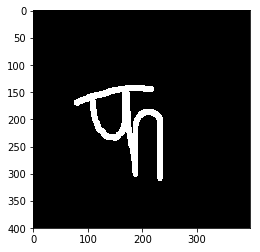

In [80]:
plt.imshow(image)
print(image.shape)


In [81]:
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

In [82]:
corners = cv.goodFeaturesToTrack(gray,100,0.01,10)
corners = np.int0(corners)

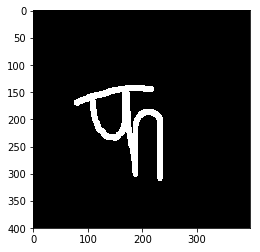

In [83]:
total_x=[]
total_y=[]
for corner in corners:
    x,y = corner.ravel()
    total_x.append(x)
    total_y.append(y)    
plt.imshow(image)

In [84]:
initial_x = np.amin(total_x)
initial_y = np.amin(total_y)
final_x = np.amax(total_x)
final_y = np.amax(total_y)

In [85]:
width = np.amax(total_x) - np.amin(total_x)
width

162

In [86]:
height = np.amax(total_y) - np.amin(total_y)
height

174

In [87]:
difference = width-height
half_difference = math.floor(abs(difference)/2)
if(difference<0):
    width+=abs(difference)
    final_x = initial_x + width
    final_x = final_x-half_difference
    initial_x = initial_x-half_difference
elif(difference>0):
    height+=abs(difference)
    final_y = initial_y + height
    final_y = final_y-half_difference
    initial_y = initial_y-half_difference
    
print(width,height,half_difference)

174 174 6


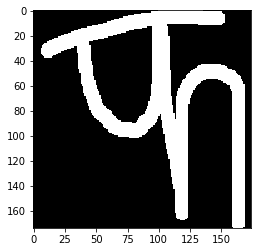

In [88]:
crop_img = image[initial_y:final_y, initial_x:final_x]
plt.imshow(crop_img)

In [89]:
crop_img.shape

(174, 174, 3)

In [90]:
cv.imwrite("cropped.jpg",crop_img)

True